# Prédiction de la qualité du vin

Nous allons utiliser aujourd'hui le jeu de données "Wine Quality" disponible sur le site [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality). Source : P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Deux jeux de données ont été créés à l'aide d'échantillons du vin portugais "Vinho Verde", un jeu de données par variété : vin rouge et vin blanc. Nous allons utiliser aujourd'hui le jeu de données sur le vin blanc pour réaliser ce projet de prédiction.

L'objectif : prédire la qualité du vin blanc à partir de ses caractéristiques physico-chimiques.

Ce jeu de données contient **4898 lignes** et **12 variables** relatives aux données physico-chimiques et à la qualité du vin :

1. **fixed acidity** : l'acidité fixe
2. **volatile acidity** : l'acidité volatile
3. **citric acid** : l'acide citrique
4. **residual sugar** : le sucre résiduel
5. **chlorides** : les chlorures
6. **free sulfur dioxide** : le dioxyde de soufre libre
7. **total sulfur dioxide** : le dioxyde de soufre total
8. **density** : la densité
9. **pH** : le pH
10. **sulphates** : les sulfates
11. **alcohol** : l'alcool
12. **quality** : la qualité du vin (un score entre 0 et 10)

Le score de qualité du vin a été attribué par des experts, c'est un score entre 0 (très mauvais) et 10 (excellent).

## Analyse du jeu de données
### Importation des données

In [1]:
import pandas as pd

df = pd.read_csv("data/winequality-white.csv", sep=";")

# Aperçu des 5 premières lignes
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Informations statistiques

In [2]:
# Informations sur les types de données et le nombre de valeurs non nulles :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
# Statistiques :
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Vérifions si le jeu de données contient des valeurs manquantes :

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Aucune valeur manquante n'est présente dans le jeu de données, regardons maintenant la répartition de la variable cible (quality) :

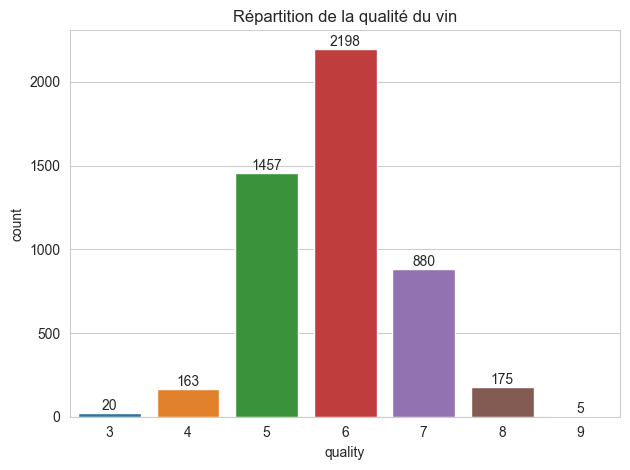

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage de la répartition de la qualité du vin et le nombre de valeurs par classe :
ax = sns.countplot(x="quality", data=df)
for c in ax.containers:
    ax.bar_label(c)

plt.title("Répartition de la qualité du vin")
plt.tight_layout()
plt.show()

In [6]:
# Pourcentage de chaque classe :
(df["quality"].value_counts(normalize=True).sort_index() * 100).round(2)

quality
3     0.41
4     3.33
5    29.75
6    44.88
7    17.97
8     3.57
9     0.10
Name: proportion, dtype: float64

Nous pouvons constater que dans ce jeu de données les données sont déséquilibrées, les scores vont de 3 à 9 et la majorité des vins ont une qualité de score 6 (44.88%). Le score le plus rare est le 9 (0.10%).

### Détection des outliers (valeurs aberrantes)

Nous allons utiliser les boîtes à moustaches (boxplots) pour détecter les outliers dans les données, c'est une méthode simple et claire pour les visualiser. Matplotlib (et donc Seaborn) utilisent la méthode des 1.5 IQR (InterQuartile Range) pour déterminer les outliers, c'est-à-dire que la boîte s'étend du premier quartile (Q1) au troisième quartile (Q3) des données, les moustaches (whiskers) s'étendent de Q1 - 1.5 IQR à Q3 + 1.5 IQR, tous les points en dehors de ces moustaches sont considérés comme des outliers potentiels :

<Figure size 3200x2200 with 0 Axes>

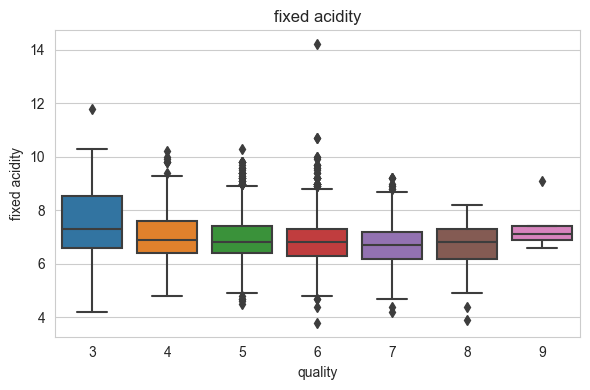

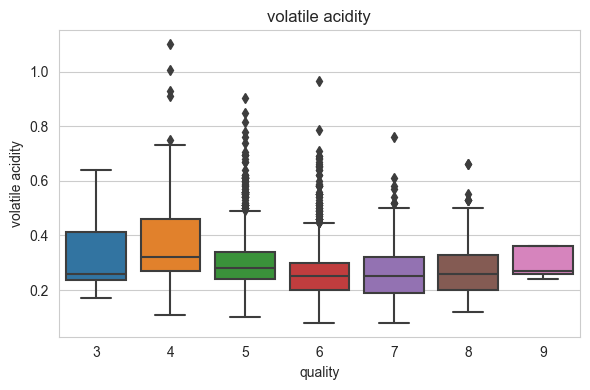

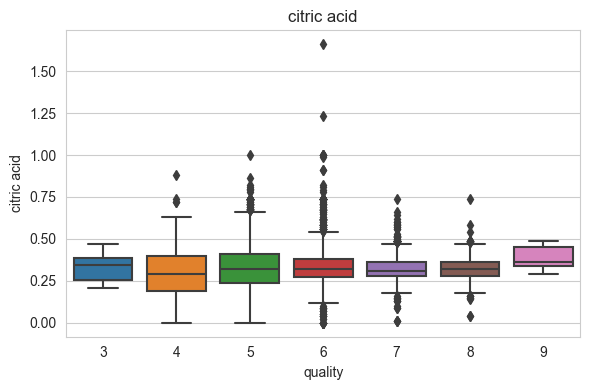

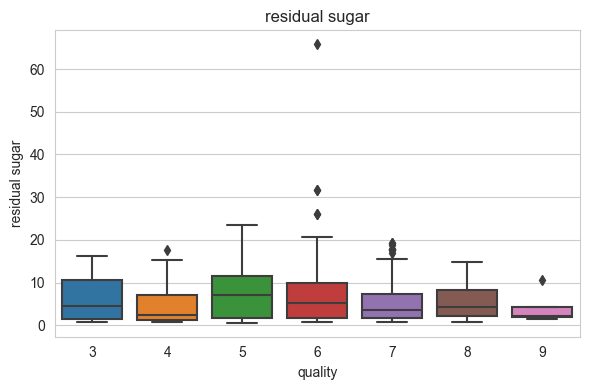

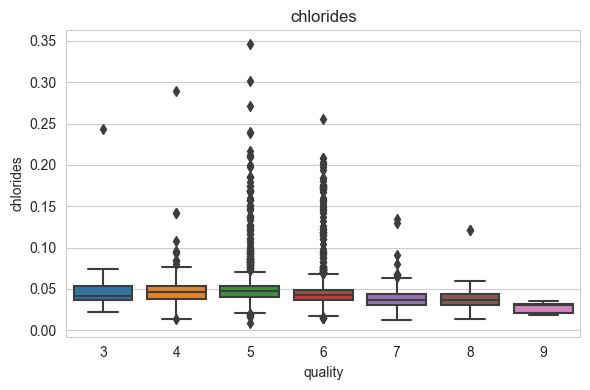

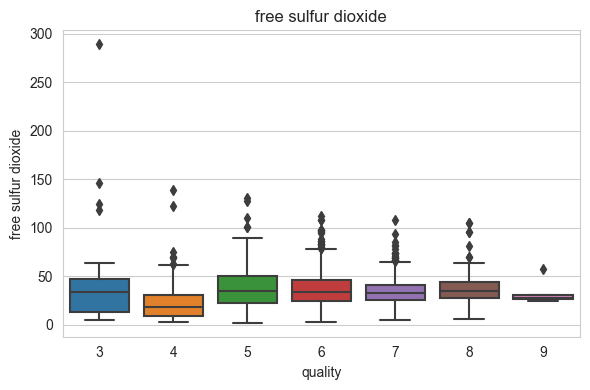

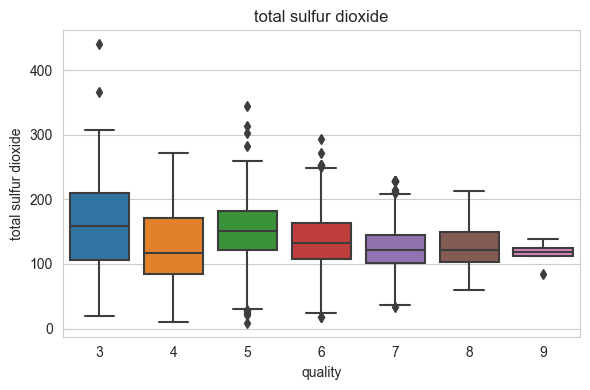

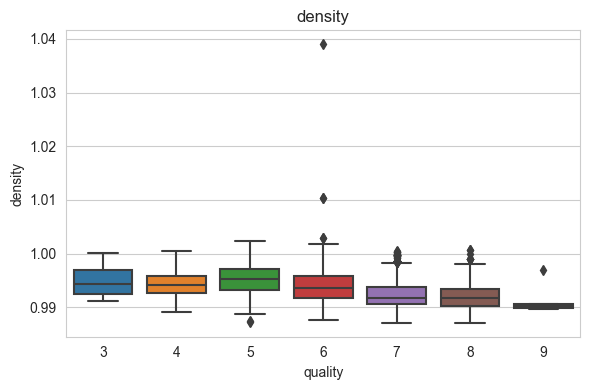

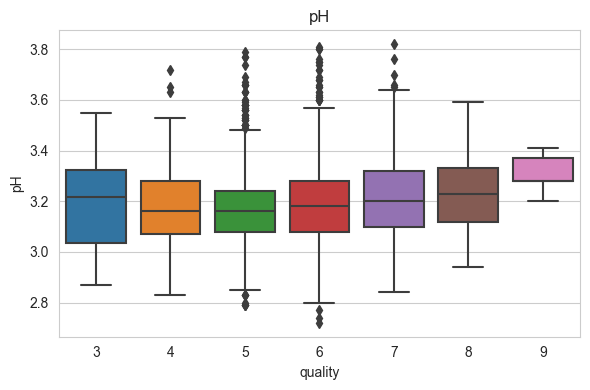

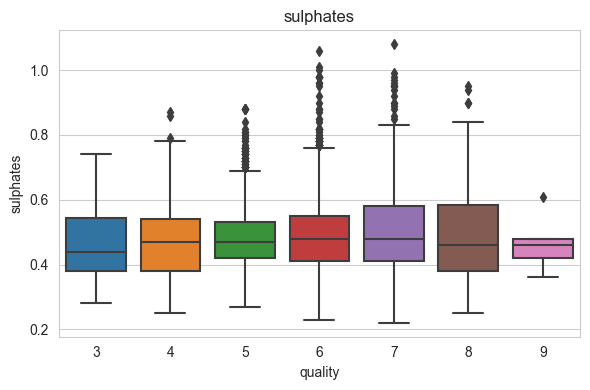

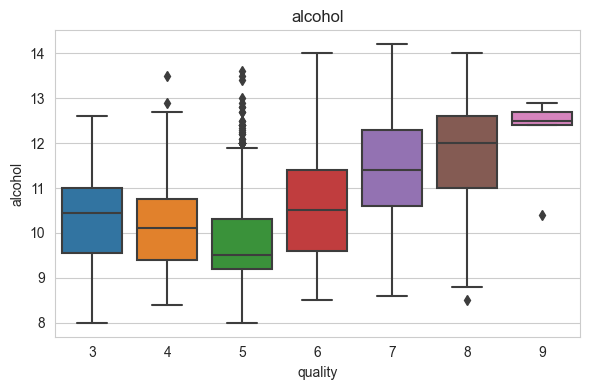

In [7]:
# Création de boxplots suivant la qualité du vin

plt.figure(figsize=(32,22))

for col in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='quality', y=col, data=df)
    plt.title(col)
    plt.tight_layout()
    plt.show()

Nous pouvons constater bon nombre d'outliers dans les données. Nous allons maintenant utiliser Isolation Forest pour détecter et supprimer les outliers.

In [8]:
from sklearn.ensemble import IsolationForest

# Avant de supprimer les outliers nous allons enlever la variable cible (quality) dans une copie de la dataframe :
df_no_quality = df.drop("quality", axis=1)

# Initialisation de Isolation Forest pour détecter les outliers
# n_estimators = nombre d'arbres dans la forêt
# contamination = proportion d'outliers dans les données
# random_state = seed pour la reproductibilité
iforest = IsolationForest(n_estimators=100, contamination='auto', random_state=0)

iforest.fit(df_no_quality)

# Prédiction des outliers :
# -1 = outlier (anormal), 1 = inlier (normal)
outliers = iforest.predict(df_no_quality)

# On ajoute une colonne pour flagger les outliers dans nos données :
df["outlier"] = outliers

print(f"Nombre total de lignes à l'origine : {df.shape[0]}")
print(f"Nombre d'outliers détectés : {outliers[outliers == -1].shape[0]}")

Nombre total de lignes à l'origine : 4898
Nombre d'outliers détectés : 375


Voici des exemples de lignes considérées comme des outliers :

In [9]:
df[df["outlier"] == -1].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,outlier
14,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.0002,2.98,0.67,9.7,5,-1
17,6.2,0.66,0.48,1.20,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,-1
20,6.2,0.66,0.48,1.20,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,-1
23,7.6,0.67,0.14,1.50,0.074,25.0,168.0,0.9937,3.05,0.51,9.3,5,-1
54,6.8,0.20,0.59,0.90,0.147,38.0,132.0,0.9930,3.05,0.38,9.1,6,-1


Nous allons maintenant supprimer les outliers de notre jeu de données :

In [10]:
# Suppression des lignes de données contenant des outliers :
df = df[outliers != -1]
#df = df[df["outlier"] != -1]

print(f"Nombre total de lignes restantes après suppression des outliers : { df.shape[0]}")

Nombre total de lignes restantes après suppression des outliers : 4523


On vérifie qu'on a bien supprimé tous les outliers :

In [11]:
df["outlier"].value_counts()

outlier
1    4523
Name: count, dtype: int64

Tout est bon, on ne garde que les points normaux (inliers) d'après Isolation Forest. On peut donc se débarrasser de la colonne "outlier" et continuer notre exploration :

In [12]:
df = df.drop("outlier", axis=1)

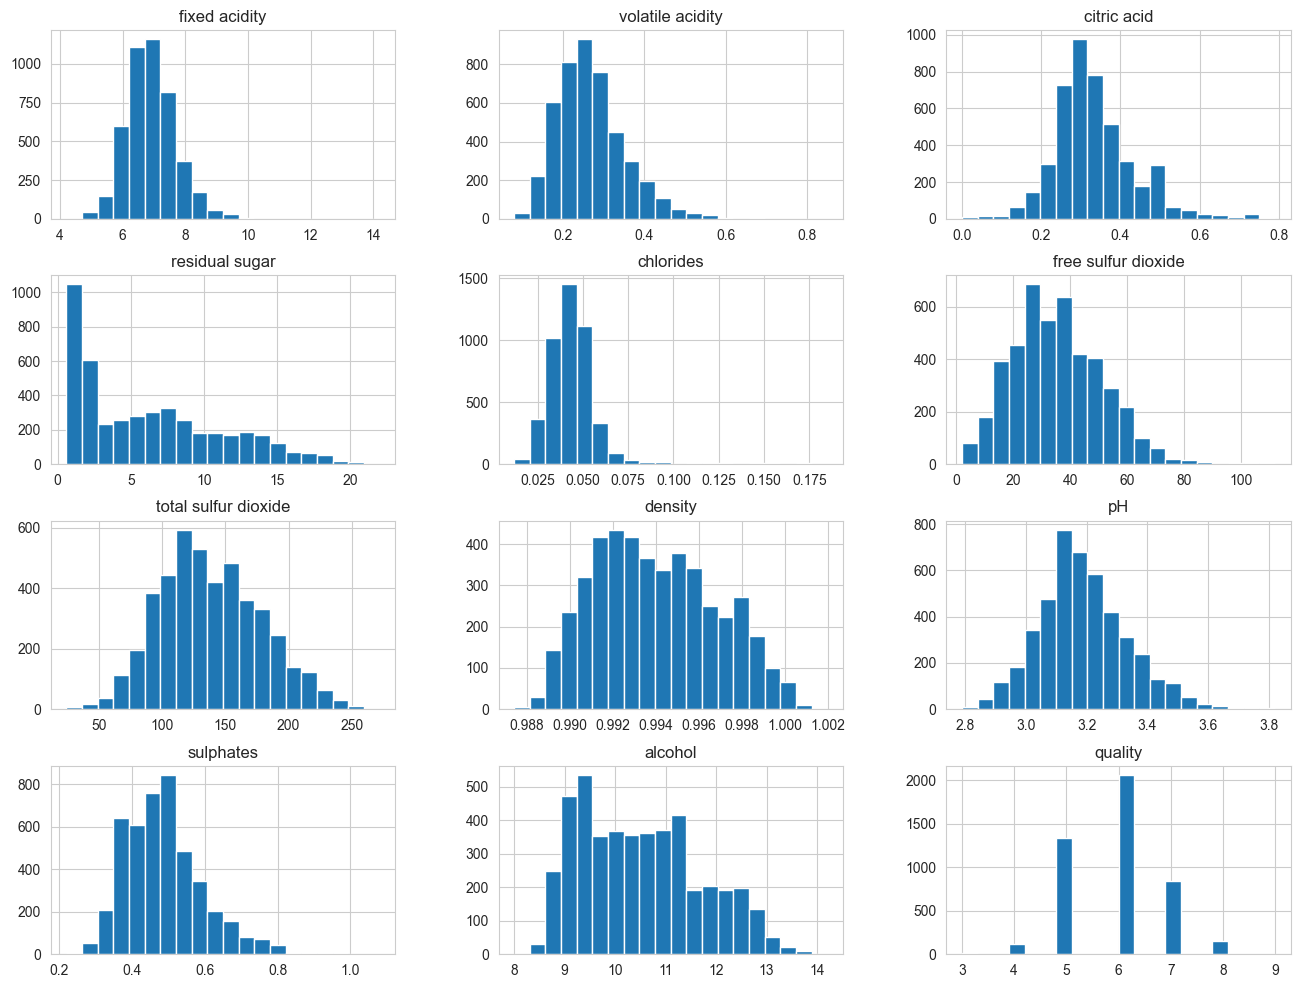

In [13]:
# Répartition des variables après suppression des outliers :
df.hist(figsize=(16, 12), bins=20)
plt.show()

### Matrice de corrélation

Maintenant que nous avons supprimé les outliers, nous allons regarder la matrice de corrélation entre les variables pour mieux comprendre les relations entre elles :

Text(0.5, 1.0, 'Matrice de corrélation')

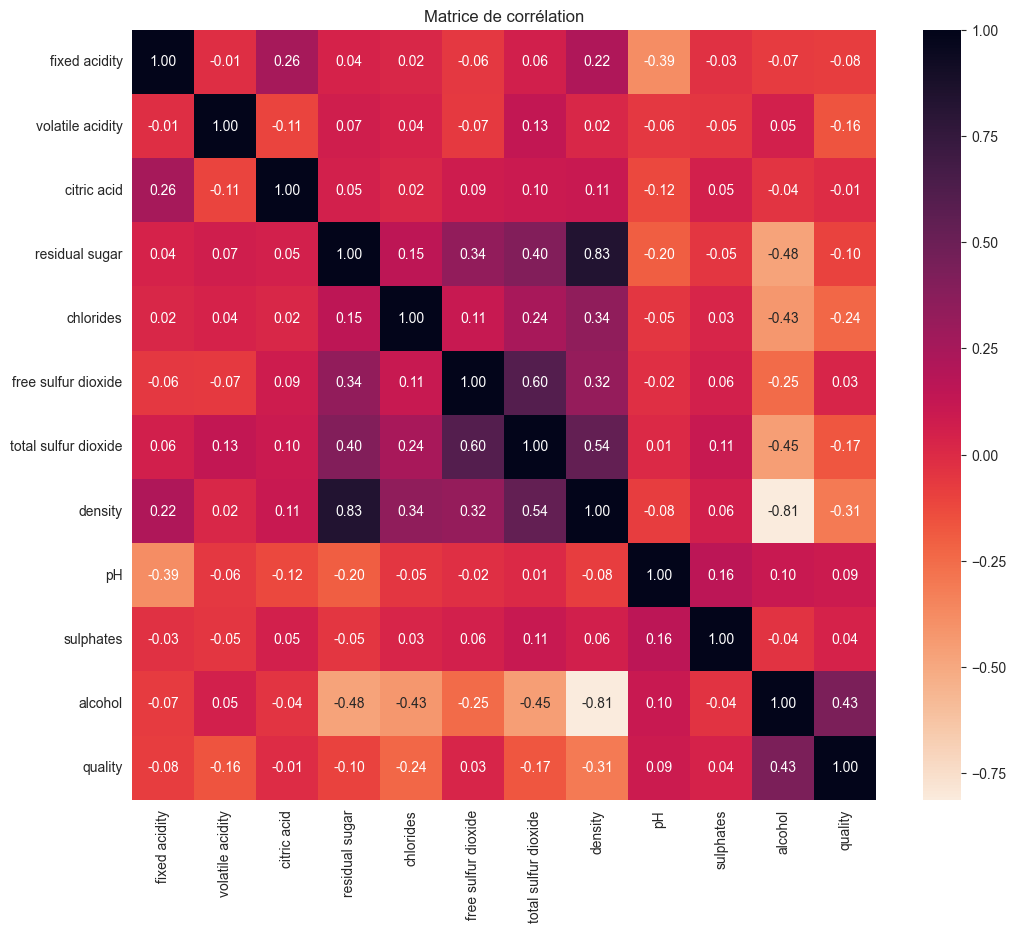

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="rocket_r")
plt.title("Matrice de corrélation")

Il est intéressant de constater que la qualité du vin est fortement corrélée avec le taux d'alcool dans le vin (0.43), suivi par le pH (0.09), la corrélation la plus négative de la qualité est avec la densité.

Cette dernière est fortement corrélée avec le sucre résiduel (0.83) et le dioxyde de soufre total (0.54). La densité a cependant une forte corrélation négative avec le taux d'alcool (-0.81). Le souffre total est également fortement corrélé avec le souffre libre (0.60).

<Axes: xlabel='quality', ylabel='alcohol'>

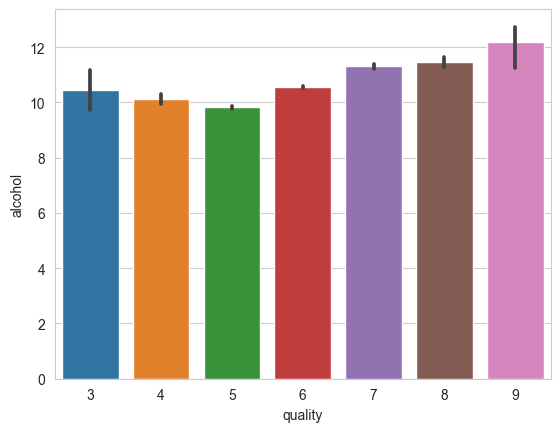

In [15]:
# Distribution de la qualité du vin en fonction du taux d'alcool :
sns.barplot(x="quality", y="alcohol", data=df)

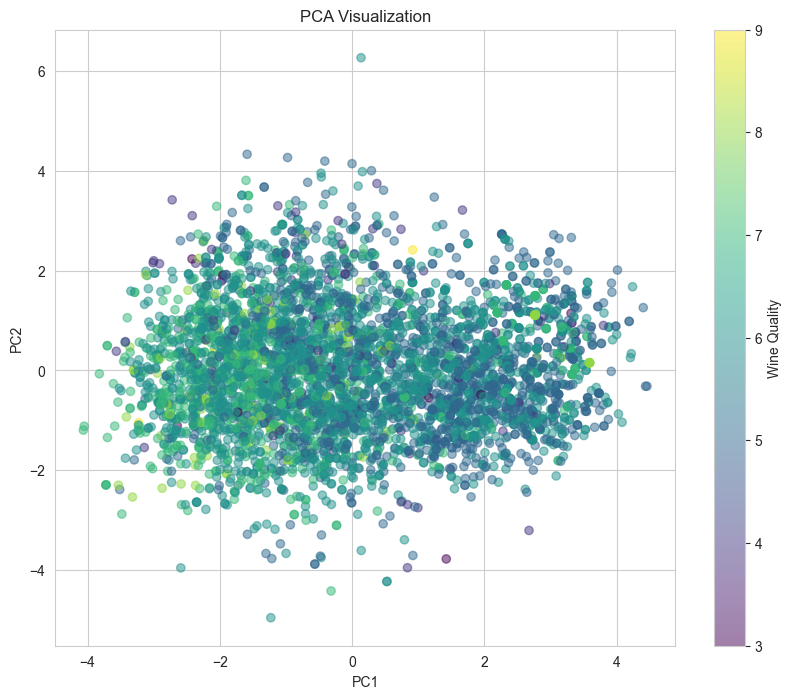

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalisation des données pour la PCA
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df.drop(columns=["quality"]))

# On réduit la dimension des données à 2 composantes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)

# Affichage des 2 composantes principales
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df["quality"], cmap="viridis", alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.colorbar(label="Wine Quality")
plt.show()

## Prediction de la qualité du vin

Nous allons maintenant prédire la qualité du vin à partir de ses caractéristiques physico-chimiques. Nous allons utiliser plusieurs modèles de classification et comparer leurs performances, commençons par la régression linéaire.


### Régression linéaire

La régression linéaire est un algorithme de régression qui modèlise la relation entre une variable dépendante (target) et une ou plusieurs variables indépendantes (features) en ajustant une droite de régression linéaire à travers les données.

Les paramètres principaux de la régression linéaire sont :
- **fit_intercept** : ajoute le biais (intercept) à la fonction de décision si True, par défaut fit_intercept = True.
- **normalize** : normalise les variables indépendantes si True, par défaut normalize = False.
- **n_jobs** : nombre de jobs à lancer pour le calcul, plus il y a de jobs plus l'entraînement est rapide, par défaut n_jobs = None.

Les avantages de la régression linéaire sont :
- Simple à comprendre et à mettre en oeuvre.
- Rapide à entrainer.

Ses inconvénients sont :
- Fonctionne mal avec des variables non linéaires.
- Sensible aux outliers.

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report, roc_auc_score, \
    mean_squared_error, confusion_matrix

# Séparation des données d'entrainement et de test,
# x = données d'entrainement, y = variable cible
x = df.drop("quality", axis=1)
y = df["quality"]
features = x.columns

scaler.fit(x)
x = scaler.transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Initialisation du modèle de régression linéaire
linreg = LinearRegression()

# Entrainement du modèle
linreg.fit(X_train, y_train)

# Coefficients de la régression linéaire
coefficients = pd.DataFrame(linreg.coef_, features, columns=["Coefficients"])
print(coefficients)

# Prédiction sur les données de test
y_pred = linreg.predict(X_test)

# Evaluation du modèle
print(f"Score R² : {linreg.score(X_test, y_test)}")
print(f"Score RMSE : {mean_squared_error(y_test, y_pred) ** 0.5}")

                      Coefficients
fixed acidity             0.111080
volatile acidity         -0.162018
citric acid              -0.014103
residual sugar            0.512792
chlorides                -0.018978
free sulfur dioxide       0.086773
total sulfur dioxide     -0.006711
density                  -0.630033
pH                        0.136180
sulphates                 0.060653
alcohol                   0.112747
Score R² : 0.27533956357663103
Score RMSE : 0.7157159995641126


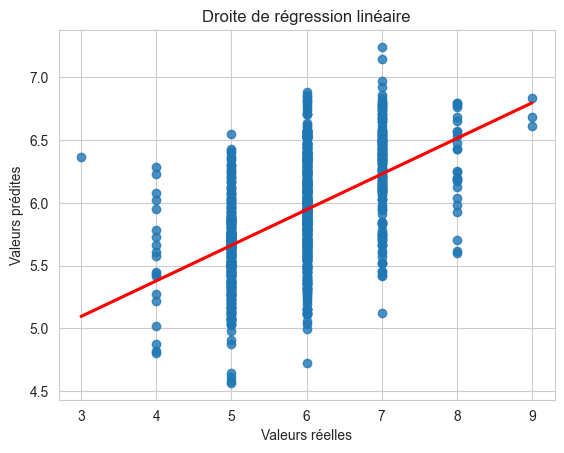

In [18]:
# Droite de régression linéaire
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"}, ci=None)
plt.title("Droite de régression linéaire")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.show()

Les scores ne sont pas bons.

La régression logistique effectue une classification binaire, les scores de qualité vont de 3 à 9, il est donc possible de transformer la variable cible en une variable binaire pour pouvoir utiliser cette méthode de classification, en considérant par exemple que les scores de qualité inférieurs à 6 (la moyenne ici) sont de mauvaise qualité, donc 0 et que les scores égaux ou supérieurs à 6 sont de bonne qualité, donc 1.

Nous pouvons sinon utiliser l'option multi_class='multinomial' pour effectuer une classification multiclasse.

### Régression logistique

La régression logistique est un algorithme de classification qui permet de prédire la probabilité qu'un échantillon appartienne à une classe en utilisant la fonction logistique.

Les paramètres principaux de la régression logistique sont :
- **penalty** : type de régularisation à utiliser, par défaut penalty = 'l2'.
- **C** : inverse de la force de régularisation, les valeurs faibles augmentent la régularisation, par défaut C = 1.0.
- **solver** : algorithme d'optimisation, par défaut solver = 'lbfgs'.
- **max_iter** : nombre maximum d'itérations pour la convergence, par défaut max_iter = 100.

Les avantages de la régression logistique sont :
- Simple à comprendre et à mettre en oeuvre.
- Rapide à entrainer.

Ses inconvénients sont :
- Fonctionne mal avec des variables non linéaires.
- Sensible aux outliers.

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        19
           5       0.57      0.48      0.52       279
           6       0.52      0.71      0.60       418
           7       0.46      0.28      0.34       160
           8       1.00      0.00      0.00        25
           9       0.00      0.00      1.00         3

    accuracy                           0.52       905
   macro avg       0.65      0.21      0.35       905
weighted avg       0.55      0.52      0.50       905



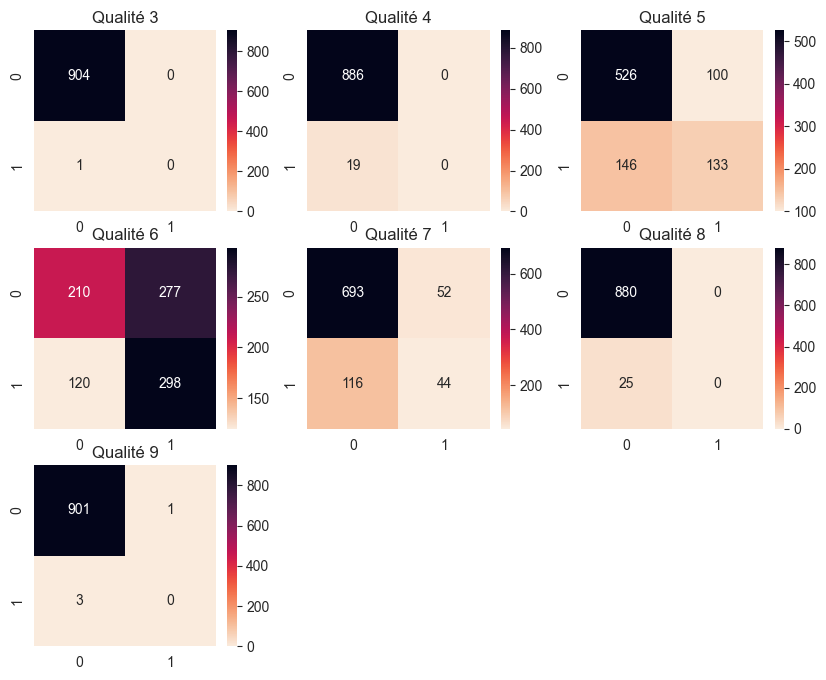

In [19]:
from sklearn.linear_model import LogisticRegression

#Transformation de la variable cible en une variable binaire :
# df_binary_quality = df.copy()
# df_binary_quality["quality"] = df_binary_quality["quality"].apply(lambda x: 0 if x < 6 else 1)

# Initialisation du modèle de régression logistique
logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg')

# Entrainement du modèle
logreg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = logreg.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred, zero_division=1))

# Matrices de confusion
fig = plt.figure(figsize=(10, 8))
multi_cm = multilabel_confusion_matrix(y_test, y_pred)
for i in range(7):
    ax = fig.add_subplot(3, 3, i + 1)
    sns.heatmap(multi_cm[i], annot=True, fmt=".0f", cmap="rocket_r")
    plt.title(f"Qualité {i + 3}")

Nous pouvons constater ici l'effet d'avoir des données déséquilibrées au sein de ce jeu de données, les scores 3, 4, 8 et 9 sont très peu représentés, ils n'ont même pas été pris en considération dans la prédiction, nous pouvons constater que les scores de recall sont à 0 pour ces valeurs. En parallèle, le score 6 qui est le plus représenté a un taux de recall de 71% et un score F1 de 60%.

Faisons un essai supplémentaire en utilisant cette fois une classification binaire, comme mentionné plus haut :

              precision    recall  f1-score   support

           0       0.63      0.45      0.53       299
           1       0.76      0.87      0.81       606

    accuracy                           0.73       905
   macro avg       0.70      0.66      0.67       905
weighted avg       0.72      0.73      0.72       905



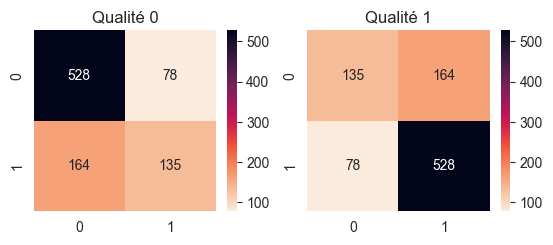

In [20]:
# Transformation de la variable cible en une variable binaire :
df_binary_quality = df.copy()
df_binary_quality["quality"] = df_binary_quality["quality"].apply(lambda x: 0 if x < 6 else 1)

x_binary = df_binary_quality.drop("quality", axis=1)
y_binary = df_binary_quality["quality"]

scaler.fit(x_binary)
x_binary = scaler.transform(x_binary)

X_train, X_test, y_train, y_test = train_test_split(x_binary, y_binary, test_size=0.2, random_state=10)

# Initialisation du modèle de régression logistique
logreg = LogisticRegression()

# Entrainement du modèle
logreg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = logreg.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred, zero_division=1))

# Matrice de confusion
fig = plt.figure(figsize=(10, 8))
multi_cm = multilabel_confusion_matrix(y_test, y_pred)
for i in range(2):
    ax = fig.add_subplot(3, 3, i + 1)
    sns.heatmap(multi_cm[i], annot=True, fmt=".0f", cmap="rocket_r")
    plt.title(f"Qualité {i}")


La classification binaire est bien plus efficace ici, c'est normal puisque nous avons plus de données dans chaque catégorie même si la catégorie 0 reste moins représentée que la catégorie 1. Nous allons maintenant regarder d'autres méthodes de classification afin de comparer les performances.

### Random Forest

Random Forest est un algorithme d'apprentissage en ensemble (ensemble learning) qui combine plusieurs modèles d'arbres de décision (decision trees) pour effectuer une classification ou une régression. Il s'agit d'une méthode d'apprentissage supervisé très efficace.

Les paramètres principaux de Random Forest sont :
- **n_estimators** : nombre d'arbres dans la forêt, plus ce nombre est élevé plus le modèle sera précis (attention à l'overfit bien évidemment). Par défaut n_estimators = 100.
- **max_depth** : profondeur maximale de l'arbre, permet de limiter l'overfitting, par défaut max_depth = None.
- **max_features** : nombre de variables à considérer pour trouver le meilleur split.

Les avantages de Random Forest sont :
- Robuste aux valeurs aberrantes (outliers) et aux données manquantes.
- Efficace pour des problèmes de classification et de régression.
- Affiche les scores d'importance des variables (feature importance)

Ses inconvénients sont :
- Lent à entrainer lorsqu'il y a beaucoup d'arbres.
- Difficile à interpréter.

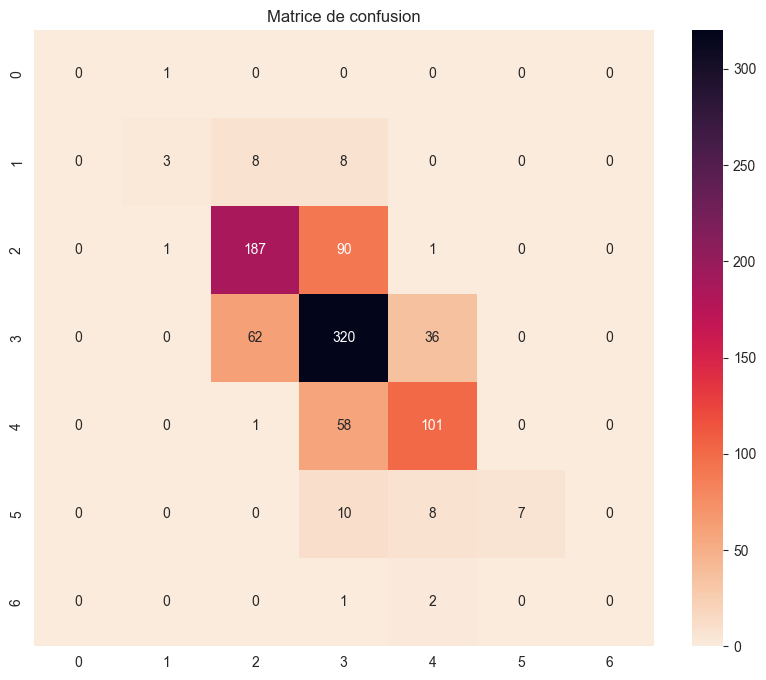

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation du modèle
rf = RandomForestClassifier(n_estimators=100, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Entrainement du modèle
rf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = rf.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="rocket_r")
plt.title("Matrice de confusion")
plt.show()

In [22]:
# Rapport de classification
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.60      0.16      0.25        19
           5       0.72      0.67      0.70       279
           6       0.66      0.77      0.71       418
           7       0.68      0.63      0.66       160
           8       1.00      0.28      0.44        25
           9       1.00      0.00      0.00         3

    accuracy                           0.68       905
   macro avg       0.81      0.36      0.39       905
weighted avg       0.69      0.68      0.67       905



In [23]:
# Feature importance
feature_importance = pd.DataFrame(rf.feature_importances_, index=features, columns=["Importance"])
feature_importance.sort_values(by="Importance", ascending=False)

,Importance
alcohol,0.114300
density,0.101629
volatile acidity,0.098250
free sulfur dioxide,0.096376
total sulfur dioxide,0.093944
pH,0.087992
residual sugar,0.087036
chlorides,0.085502
citric acid,0.079719
sulphates,0.079088


Les scores avec l'algorithme Random Forest sont bien plus intéressants qu'avec la régression linéaire et logistique, même si ici aussi à cause du déséquilibre des données les scores de recall sont à 0 pour les scores aux extrémités : 3 et 9. Par ailleurs, il est intéressant de noter les variables les plus importantes pour la prédiction de la qualité, d'après Random Forest, sont le taux d'alcool, la densité et l'acidité volatile.

La précision (accuracy) est à 68% au total, ce modèle a donc un réel intérêt pour prédire la qualité du vin. Nous allons maintenant essayer la méthode XGBoost.

### XGBoost

XGBoost (Extreme Gradient Boosting) est un algorithme d'apprentissage en ensemble conçu pour booster la performance des tâches de classification et de régression.

Les paramètres principaux de XGBoost sont :
- **n_estimators** : nombre d'arbres à ajuster, plus ce nombre est élevé plus le modèle sera précis (attention à l'overfit). Par défaut n_estimators = 100.
- **max_depth** : profondeur maximale de l'arbre, permet de limiter l'overfitting.
- **learning_rate** : taux d'apprentissage, par défaut learning_rate = 0.1.

Les avantages de XGBoost sont :
- Très précis
- Rapide et performant

Ses inconvénients sont :
- Difficile à interpréter
- Risque d'overfitting si les paramètres sont mal réglés

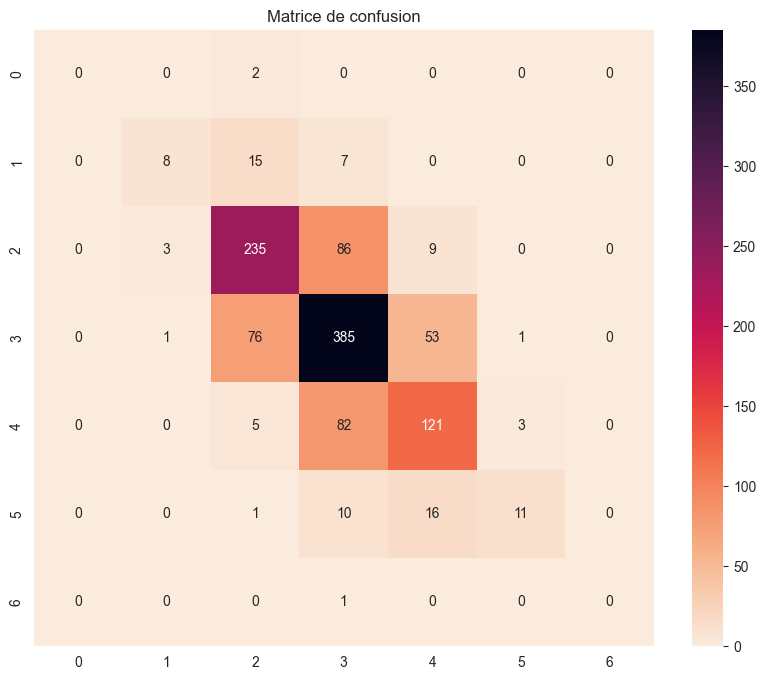

In [24]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Label encoding de la variable cible sinon XGBoost ne fonctionne pas
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
y = label_encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=10, stratify=y)

# Initialisation du modèle et entrainement
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, verbose=0, eval_set=[(X_train, y_train), (X_test, y_test)])

# Prédiction sur les données de test
y_pred = xgb_clf.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="rocket_r")
plt.title("Matrice de confusion")
plt.show()

In [25]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.67      0.27      0.38        30
           2       0.70      0.71      0.70       333
           3       0.67      0.75      0.71       516
           4       0.61      0.57      0.59       211
           5       0.73      0.29      0.42        38
           6       1.00      0.00      0.00         1

    accuracy                           0.67      1131
   macro avg       0.77      0.37      0.40      1131
weighted avg       0.67      0.67      0.66      1131



XGBoost donne des résultats plutôt similaires à Random Forest, avec une précision de 67%.

Essayons une approche supplémentaire, cette fois-ci nous allons traiter le problème de déséquilibre des données en utilisant l'oversampling avec l'algorithme SMOTE (Synthetic Minority Oversampling Technique) qui va créer des données synthétiques pour les classes minoritaires. Nous allons par ailleurs utiliser un autre algorithme de prédiction : KNN (K-Nearest Neighbors).

### KNN (sans SMOTE et avec SMOTE)

KNN est un algorithme de classification qui va prédire la classe d'un point en fonction de ses K plus proches voisins en utilisant la distance euclidienne.

Les paramètres principaux de KNN sont :
- **n_neighbors** : nombre (K) de voisins à considérer, plus ce nombre est petit plus le modèle est sensible au bruit et aux outliers, mais un nombre trop grand peut amener à de l'oversmoothing (lissage excessif) et ainsi à une perte de précision. Par défaut n_neighbors = 5.
- **weights** : le poids de chaque voisin lors du processus de prédiction, par défaut weights = 'uniform', c'est-à-dire que tous les voisins ont le même poids.
- **metric** : la distance utilisée pour calculer la similarité entre les points, par défaut metric = 'minkowski' (distance euclidienne).

Les avantages de KNN sont :
- Algorithme simple à comprendre et à mettre en oeuvre.
- Il peut traiter la classification multiclasse.

Ses inconvénients sont :
- Il est particulièrement sensible au bruit, outliers, au choix de la distance et du nombre K
- Il est lent, le calcul de la distance entre tous les points est long
- Ne performe pas bien sur des données de haute dimension

Nous allons maintenant essayer d'utiliser KNN sans oversampling :

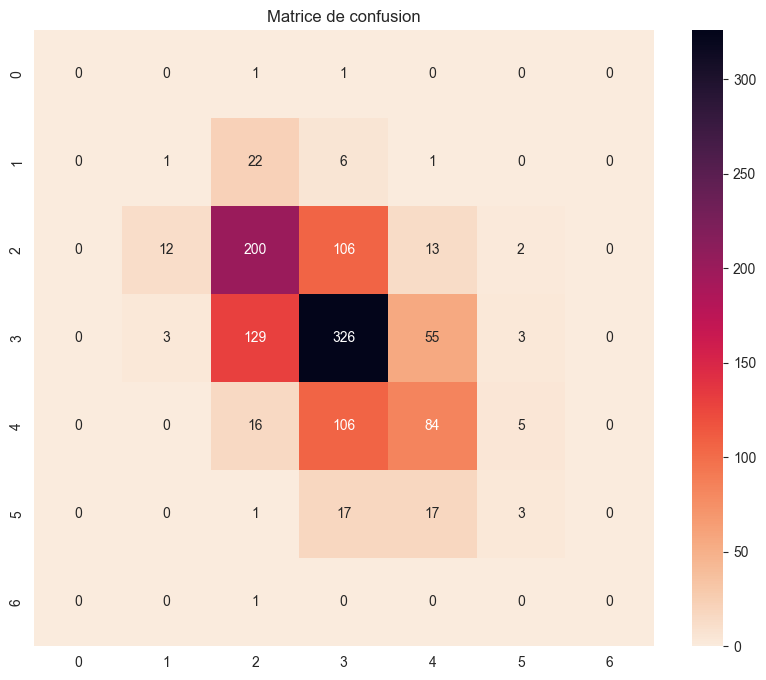

In [26]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=10, stratify=y)

# Initialisation du modèle
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="rocket_r")
plt.title("Matrice de confusion")
plt.show()

In [27]:
# Rapport de classification
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.06      0.03      0.04        30
           2       0.54      0.60      0.57       333
           3       0.58      0.63      0.60       516
           4       0.49      0.40      0.44       211
           5       0.23      0.08      0.12        38
           6       1.00      0.00      0.00         1

    accuracy                           0.54      1131
   macro avg       0.56      0.25      0.25      1131
weighted avg       0.53      0.54      0.53      1131



Essayons maintenant l'oversampling avec SMOTE :

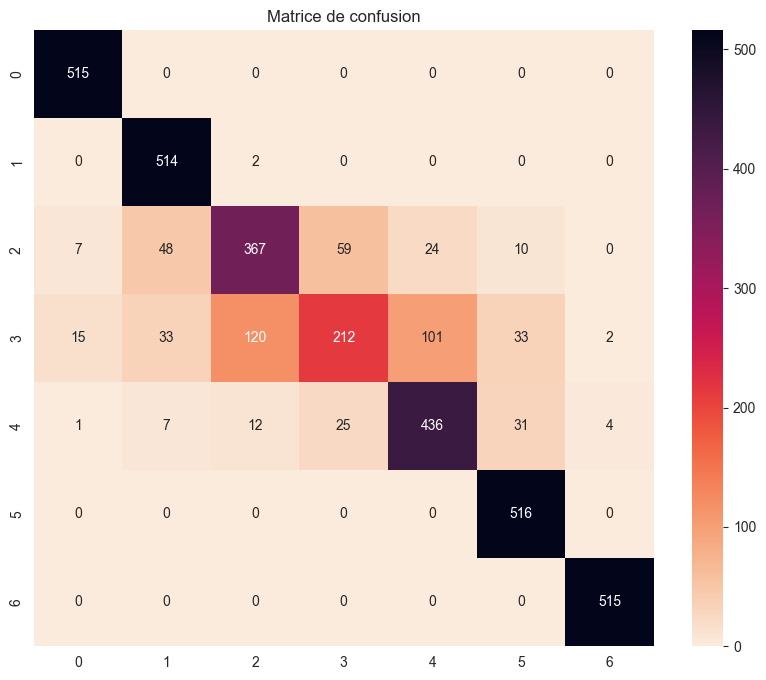

In [28]:
from imblearn.over_sampling import SMOTE

# Réequilibrage des données avant d'entrainer le modèle
smote = SMOTE(k_neighbors=4, random_state=10)
X_smote, y_smote = smote.fit_resample(x, y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state=10, stratify=y_smote)

# Initialisation du modèle
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="rocket_r")
plt.title("Matrice de confusion")
plt.show()

In [29]:
# Rapport de classification
print(classification_report(y_test, y_pred, zero_division=1))
print(f"Cross validation score : {cross_val_score(knn, X_smote, y_smote, cv=5).mean()*100:.2f}%")

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       515
           1       0.85      1.00      0.92       516
           2       0.73      0.71      0.72       515
           3       0.72      0.41      0.52       516
           4       0.78      0.84      0.81       516
           5       0.87      1.00      0.93       516
           6       0.99      1.00      0.99       515

    accuracy                           0.85      3609
   macro avg       0.84      0.85      0.84      3609
weighted avg       0.84      0.85      0.84      3609

Cross validation score : 83.23%


Les résultats sont bien plus performants en rééquilibrant les données avec SMOTE, on passe d'une précision de 54% avec KNN à un score de 85% (CV score de 83%) en utilisant SMOTE avant d'entrainer le modèle KNN. Cet exemple illustre tout l'intérêt de traiter les données déséquilibrées avant d'entraîner un modèle, les modèles de classification ne sont pas conçus pour traiter les déséquilibres dans les données.

### Conclusion

Nous avons constaté plusieurs éléments pour pouvoir réaliser nos prédictions :

- La classification binaire est plus efficace que la classification multiclasse dans ce cas de figure, puisque nous avons des données déséquilibrées.
- Les données déséquilibrées ont un impact sur les performances des modèles de classification, il est donc important de traiter ce problème en amont.
- Il est important d'expérimenter plusieurs modèles de classification pour trouver celui qui convient le mieux aux données, ici Random Forest et KNN + SMOTE ont donné les meilleurs résultats, tandis que la régression linéaire et logistique n'ont pas donné de résultats satisfaisants.